In [1]:
## 지금까지 사용한 신경망은 피드포워드(feed forward)라는 유형의 신경망이다.
## 피드포워드란 흐름이 단 방향인 신경망을 말한다.
## 피드포워드 신경망은 구성이 단순하여 이해하기 쉽고, 많은 문제에 응용할 수 있다.
## 그러나 이미지 같은 공간 데이터나 시계열 데이터를 잘 다루지 못한다.
## 따라서 공간 데이터 같은 경우 CNN을, 시계열 데이터의 경우 RNN을 사용한다.

# 1. 확률과 언어 모델

### word2vec을 확률 관점에서 바라보다

In [3]:
## w1, w2, ..., wT라는 단어열로 표현되는 말뭉치를 생각해보자.
## 그리고 t번째 단어를 '타깃'으로 그 전후 단어(t-1번째와 t+1번째)를 '맥락'으로 취급해보자

## 이때, CBOW 모델은 맥락 w(t-1)과 w(t+1)로부터 타깃 wt를 추측하는 일을 수행한다.

## 그럼 w(t-1)과 w(t+1)이 주어졌을 때 타깃이 wt가 될 확률을 수식으로 나타내면
## P(wt | w(t-1), w(t+1))이 된다.

In [4]:
## CBOW 모델은 사후 확률을 모델링한다.
## 이 사후 확률은 w(t-1)과 w(t+1)이 주어졌을 때 wt가 일어날 확률을 뜻한다.
## 이것은 윈도우 크기가 1일 때의 CBOW 모델이다.

## 지금까지는 맥락을 항상 좌우 대칭으로 생각해왔다. 
## 그런데 이번에는 맥락을 왼쪽 윈도우만으로 한정해보자.
## 그러면 CBOW 모델이 출력할 확률은 P(wt | w(t-2), w(t-1))처럼 된다.

In [5]:
## 따라서 CBOW 모델의 손실함수를 L = -logP(wt | w(t-2), w(t-1))처럼 쓸 수 있다. -- 교차 엔트로피 오차에 의한 결과
## CBOW 모델의 학습으로 수행하는 일은 위의 손실함수를 최소화하는 가중치를 찾는 것이다.
## 이러한 가중치를 발견하면 CBOW 모델은 맥락으로부터 타깃을 정확히 추측할 수 있게 된다.

## 그럼 CBOW 모델의 본래 목적인 '맥락으로부터 타깃을 추측하는 것'은 어디에 쓸 수 있을까?
## 확률 P(wt | w(t-2), w(t-1))은 실용적인 쓰임이 있을까?
## 여기서 '언어 모델'이 등장한다.

### 언어 모델

In [6]:
## 언어모델(Language Model)은 단어 나열에 확률을 부여한다.
## 특정한 단어의 시퀀스에 대해서, 그 시퀀스가 일어날 가능성이 어느 정도인지를 확률로 평가하는 것이다.
## you say goodbye라는 시퀀스에는 높은 확률을, you say good die에는 낮은 확률을 출력하는 것이 일종의 언어 모델이다.

## 이 언어모델은 다양하게 응용할 수 있다. '기계 번역'과 '음성 인식'이 대표적인 예이다.
## 또 언어 모델은 '새로운 문장을 생성하는 용도'로도 이용할 수 있다.

In [7]:
## 언어 모델을 수식으로 설명해보자

## w1, w2, ..., w(m)이라는 m개의 단어로 된 문장을 생각해보자
## 이때 단어가 w1, ..., w(m)이라는 순서로 출현할 확률을 P(w1, ..., w(m))으로 나타낸다.
## 이 확률은 여러 사건이 동시에 일어날 확률이므로 동시 확률이라고 한다.

In [8]:
## 이 동시 확률은 사후 확률을 사용해 분해할 수 있다.
## P(w1, ..., w(m)) = P(w(m) | w1, ..., w(m-1))P(w(m-1) | w1, ..., w(m-2)) .... P(w3 | w1, w2)P(w2 | w1)P(w1)
##                  = Pi(t = from 1 to m)(  P(wt | w1, ..., w(t-1))  )

## 동시 확률은 사후 확률의 총곱으로 나타낼 수 있다.

In [9]:
## 여기서 주목할 것은 이 사후 확률은 타깃 단어보다 왼쪽에 있는 모든 단어를 맥락으로 했을 때의 확률이라는 것이다.
## 정리하면, 우리의 목표는 P(wt | w1, ..., w(t-1))이라는 확률을 얻는 것이다.
## 이 확률을 계산할 수 있다면 언어 모델의 동시 확률 P(w1, ..., w(m))을 구할 수 있다.

### CBOW 모델을 언어 모델로?

In [10]:
## CBOW 모델을 언어 모델에 적용하려면 어떻게 하면 좋을까?
## 이는 맥락의 크기를 특정 값으로 한정하여 근사적으로 나타낼 수 있다.

## 수식으로 나타내면
## P(w1, ..., w(m)) = Pi(t = from 1 to m)( P(wt | w1, ..., w(t-1)) ) ~~= Pi(t = from 1 to m)( P(wt | w(t-2), w(t-1)) )
## 여기에서는 맥락을 왼쪽 2개 단어로 한정한다. 그러면 근사적으로 나타낼 수 있다. 

In [11]:
## 맥락은 임의의 길이로 설정할 수 있다.(5나 10 등) 
## 그러나 임의 길이로 설정한다고 해도, 결국 특정 길이로 고정된다. 그래서 특정 길이보다 더 왼쪽의 단어 정보들은 무시된다.
## Tom was watching TV in his room. Mary came into the room. Mary said hi to ( ? ).
## 위 문제에서 문맥을 고려하면 Marry가 Tom에게 인사를 건넸다가 정답이다. 
## 정답을 구하려면 ?로부터 18번째 앞에 나오는 Tom을 기억해야한다. 
## 만약 맥락이 10개였다면 제대로 답할 수 없다
## 맥락을 20까지 키우면 해결될까?
## CBOW 모델에서는 맥락 안의 단어 순서가 무시된다는 한계가 있기 때문에 불가능하다. 

In [12]:
## CBOW 모델의 은닉층에서는 단어 벡터들이 더해지므로 맥락의 단어 순서는 무시된다.
## (you, say)와 (say, you)라는 맥락을 똑같이 취급한다.
## 이상적으로는 맥락 단어 순서도 고려한 모델이 바람직하다.
## 이를 위해 맥락의 단어 벡터를 은닉층에서 연결하는 방식을 생각할 수 있다.
## 그러나 연결하는 방식은 맥락의 크기에 비례해 가중치 매개변수도 늘어난다. 이는 환영할만한 현상이 아니다.

In [13]:
## 그렇다면 이 문제는 어떻게 해결할까?
## 여기서 등장하는 것이 RNN이다.
## RNN은 맥락이 아무리 길더라도 그 맥락의 정보를 기억하는 메커니즘을 가지고 있다.
## 그래서 RNN을 사용하면 아무리 긴 시계열 데이터에도 대응할 수 있다. 

# 2. RNN이란

### 순환하는 신경망

In [14]:
## 순환하기 위해서는 닫힌 경로가 필요하다.
## 닫힌 경로가 존재해야 데이터가 순환하면서 정보가 끊임없이 갱신되게 된다.

In [1]:
## 순환경로를 포함하는 RNN계층에는 (x0, x1, ..., x(t), ...)를 입력받는데, t는 시각을 뜻한다.
## 또 각 시각에 입력되는 x(t)는 벡터라고 가정한다.
## 문장을 다루는 경우를 예로 들면, 각 단어의 분산표현(단어 벡터)이 x(t)가 되며, 이 분산 표현이 순서대로 하나씩 RNN에 입력된다.

### 순환 구조 펼치기

In [3]:
## 각 시각의 RNN 계층은 그 계층으로의 입력과 1개 시각 전의 RNN 계층으로부터의 출력을 입력으로 받는다.
## 그리고 이 두 정보를 바탕으로 현 시각의 출력을 계산한다.
## h(t) = tanh( h(t-1)*W(h) + x(t)*W(x) + b )
## RNN 은 h라는 상태를 가지고 있으며, 위 식의 형태로 갱신된다고 해석할 수 있다.
## 그래서 RNN 계층을 '상태를 가지는 계층' 혹은 '메모리가 있는 계층'이라고 한다.
## 많은 문헌에서 RNN의 출력 h(t)를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고 한다.

### BPTT

In [4]:
## RNN 계층은 가로로 펼친 신경망으로 간주할 수 있다.
## 다수의 RNN 구조가 가로로 펼쳐져 있지만 실제로는 이것이 하나의 계층이다.
## 이 순환 구조를 펼친 RNN에는 오차역전파법을 적용할 수 있다.
## 여기서의 오차역전파는 시간 방향으로 펼친 신경망의 오차역전파법이란 뜻으로
## BPTT(backpropagation through time)라고 한다.

In [7]:
## 하지만 그 전에 BPTT를 이용해 기울기를 구하려면, 매 시각 RNN 구조의 중간 데이터를 메모리에 유지해두지 않으면 안 된다.
## 따라서 시계열 데이터가 길어짐에 따라 메모리 사용량도 증가하게 된다.
## 또한 시간 크기가 커지면 역전파 시 기울기가 불안정해지는 것도 문제다.

### Truncated BPTT

In [8]:
## 큰 시계열 데이터를 취급할 때는 흔히 신경망의 연결을 적당한 길이로 끊는다.
## 시간축 방향으로 너무 길어진 신경망을 적당한 지점에서 잘라 작은 신경망 여러 개로 만든다는 아이디어이다.
## 그리고 잘라낸 작은 신경망에서 오차역전파를 수행한다.
## 이것을 Truncated BPTT라고 한다.

In [9]:
## 한 가지 주의할 점은 역전파의 연결만 끊어야 한다. 순전파의 연결은 그대로 유지해야 한다.
## 역전파는 잘라낸 신경망 단위로 학습한다.

In [10]:
## 지금까지 본 신경망에서는 미니배치 학습을 수행할 때 데이터를 무작위로 선택해 입력했다.
## 그러나 RNN에서 Truncated BPTT를 수행할 때는 데이터를 순서대로 입력해야 한다.

In [11]:
## 두 블록의 Truncated BPTT를 수행해보자
## 먼저 첫 번째 블록에 데이터를 입력해 순전파를 진행하고, 나온 출력을 다음 블록에 전달한다.
## 첫 번째 블록의 순전파가 끝나면 역전파를 수행한다. 
## 이런 식으로 순전파의 연결을 유지하면서 블록 단위로 오차역전파법을 적용한다.

### Truncated BPTT의 미니배치 학습

In [12]:
## 지금까지는 미니배치 수가 1일 때에 해당한다.
## 미니배치 학습을 수행하려면 데이터를 주는 시작 위치를 각 미니배치의 시작 위치로 옮겨줘야 한다. 

# 3. RNN 구현

In [13]:
## 지금부터 구현해야 할 것은 가로 방향으로 성장한 신경망이다.
## 그리고 Truncated BPTT 방식의 학습을 따른다면, 가로 크기가 일정한 일련의 신경망을 만들면 된다.
## 길이가 T인 시계열 데이터를 받아 각 시각의 은닉 상태를 T개 출력한다.
## 모듈화를 생각해 옆으로 성장한 신경망을 하나의 계층으로 구현한다.

In [14]:
## hs = (h0, h1, ..., h(T-1))
## xs = (x0, x1, ..., x(T-1))
## xs --> Time RNN --> hs
## 순환 구조를 펼친 후의 RNN 구조들을 하나의 계층으로 간주한다. 이를 Time RNN 계층이라고 한다.

### RNN 계층 구현

In [15]:
## RNN 처리를 한 단계만 수행하는 클래스부터 구현해보자.
## 여기서 우리는 데이터를 미니배치로 모아 처리한다.

In [16]:
## h(t-1) *  W(h)  +  x(t)  *  W(x) = h(t)
## (N, H) * (H, H) + (N, D) * (D, H) = (N, H)

In [17]:
class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None
        
    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        h_next = np.tanh(t)
        
        self.cache = (x, h_prev, h_next)
        return h_next
    
    def backward(self,dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache
        
        dt = dh_next * (1 - h_next**2)
        db = np.sum(dt, axis = 0)
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, Wh.T)
        dWx = np.matmul(x.T, dt)
        dx = np.matmul(dt, Wx.T)
        
        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db
        
        return dx, dh_prev

In [18]:
## 이어서 Time RNN 계층을 구현할 차례이다.

### Time RNN 계층 구현

In [1]:
## Time RNN 계층은 T개의 RNN 계층으로 구성된다.
## RNN 계층 T개를 연결한 신경망이다.

In [16]:
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful = False): ## 앞의 계층에서 은닉 상태를 이어 받는지 유무
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None ## 여러개의 RNN 계층을 리스트로 저장하는 용도
        
        self.h, self.dh = None, None ## h는 forward()불렀을 때 마지막 RNN 계층의 은닉 상태를 저장, 
                                      ## dh는 backward()불렀을 때 하나 앞 블록의 은닉 상태의 기울기 저장
        self.stateful = stateful
        
    def set_state(self, h):
        self.h = h
        
    def reset_state(self):
        self.h = None
    
    
    def forward(self, xs):
        Wx, Wh, b = self.params 
        N, T, D = xs.shape ## 미니배치 크기 N, 입력벡터 차원 D, T개 분량의 시계열 데이터
        D, H = Wx.shape 
        
        self.layers = []
        hs = np.empty((N, T, H), dtype = 'f')
        
        if not self.stateful or self.h is None:  ## (Not a) OR ( b )  --> 은닉상태를 이어 받는 경우 h를 영행렬로 초기화
            self.h = np.zeros((N, H), dtype = 'f')
            
        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)
            
        return hs

    
    def backward(self,dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape
        
        dxs = np.empty((N, T, D), dtype = 'f')
        dh = 0
        grads = [0, 0, 0]
        
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh) ## 합산된 기울기
            dxs[:, t, :] = dx
            
            for i, grad in enumerate(layer.grads):
                grads[i] += grad
                
        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
            
        self.dh = dh
        
        return dxs
            

# 4. 시계열 데이터 처리 계층 구현

In [17]:
## 이번 장의 목표는 RNN을 사용하여 '언어 모델'을 구현하는 것이다. 
## 여기서는 RNN 계층을 수직방향으로 몇 개 더 쌓아볼 것이다.
## 또 RNN을 사용한 언어 모델은 RNN Language Model 이므로 RNNLM이라고 할 것이다.

### RNNLM의 전체 그림

In [1]:
## w(t) --> Embedding --> RNN --> Affine --> Softmax --> y(t)

In [2]:
## 입력 데이터는 단어 ID 배열이다.
## 첫 단어로 ID가 0인 'you'가 입력된다. softmax 계층이 출력하는 확률분포를 보면 'say'에서 가장 높게 나온다.
## 이처럼 제대로 예측하려면 좋은 가중치(잘 학습된 가중치)를 사용해야한다.
## 두 번째 단어인 'say'를 입력하면 'goodbye'와 'hello'에서 높게 나온다. 
## 여기서 주목할 것은 RNN 계층은 'you say'라는 맥락을 기억하고 있다.
## 즉, RNN은 'you say'라는 과거의 정보를 응집된 은닉상태 벡터로 저장해놓고 있다.
## RNNLM은 지금까지 입력된 단어를 기억하고 그것을 바탕으로 다음에 출현할 단어를 예측한다.

### Time 계층 구현

In [5]:
## T개 분의 시계열 데이터를 한 번에 처리하는 계층을 Time XX 계층이라고 부른다.

In [6]:
class TimeEmbedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.layers = None
        self.W = W

    def forward(self, xs):
        N, T = xs.shape
        V, D = self.W.shape

        out = np.empty((N, T, D), dtype='f')
        self.layers = []

        for t in range(T):
            layer = Embedding(self.W)
            out[:, t, :] = layer.forward(xs[:, t])
            self.layers.append(layer)

        return out

    def backward(self, dout):
        N, T, D = dout.shape

        grad = 0
        for t in range(T):
            layer = self.layers[t]
            layer.backward(dout[:, t, :])
            grad += layer.grads[0]

        self.grads[0][...] = grad
        return None

In [7]:
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.dh = None, None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape

        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)
            dxs[:, t, :] = dx

            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh

        return dxs

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None


In [8]:
class TimeAffine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        N, T, D = x.shape
        W, b = self.params

        rx = x.reshape(N*T, -1)
        out = np.dot(rx, W) + b
        self.x = x
        return out.reshape(N, T, -1)

    def backward(self, dout):
        x = self.x
        N, T, D = x.shape
        W, b = self.params

        dout = dout.reshape(N*T, -1)
        rx = x.reshape(N*T, -1)

        db = np.sum(dout, axis=0)
        dW = np.dot(rx.T, dout)
        dx = np.dot(dout, W.T)
        dx = dx.reshape(*x.shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx

In [1]:
class TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None
        self.ignore_label = -1

    def forward(self, xs, ts):
        N, T, V = xs.shape

        if ts.ndim == 3:  # 정답 레이블이 원핫 벡터인 경우
            ts = ts.argmax(axis=2)

        mask = (ts != self.ignore_label)

        # 배치용과 시계열용을 정리(reshape)
        xs = xs.reshape(N * T, V)
        ts = ts.reshape(N * T)
        mask = mask.reshape(N * T)

        ys = softmax(xs)
        ls = np.log(ys[np.arange(N * T), ts])
        ls *= mask  # ignore_label에 해당하는 데이터는 손실을 0으로 설정
        loss = -np.sum(ls)
        loss /= mask.sum()

        self.cache = (ts, ys, mask, (N, T, V))
        return loss

    def backward(self, dout=1):
        ts, ys, mask, (N, T, V) = self.cache

        dx = ys
        dx[np.arange(N * T), ts] -= 1
        dx *= dout
        dx /= mask.sum()
        dx *= mask[:, np.newaxis]  # ignore_label에 해당하는 데이터는 기울기를 0으로 설정

        dx = dx.reshape((N, T, V))

        return dx

### RNNLM 학습과 평가

In [10]:
## RNNLM에서 사용하는 신경망을 SimpleRnnlm이라는 이름의 클래스로 구현해보자

In [14]:
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *

class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')       ## 표준편차 0.01 분포 초깃값
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f') ## Xavier 초깃값
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f') ## Xavier 초깃값
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f') ## Xavier 초깃값
        affine_b = np.zeros(V).astype('f')
        
        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful = True), ## Truncated BPTT 학습이라 가정하여 stateful = True 설정
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]
        
        # 모든 가중치와 기울기를 리스트에 모은다
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
            
    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss
    
    def backward(self, dout = 1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
    
    def reset_state(self):
        self.rnn_layer.reset_state()  ## 신경망의 상태를 초기화하는 메서드

### 언어 모델의 평가

In [16]:
## 언어 모델은 주어진 과거 단어로부터 다음에 출현할 단어의 확률분포를 출력한다.
## 이때 언어 모델의 예측 성능을 평가하는 척도로 퍼플렉서티(Perplexity, 혼란도)를 자주 이용한다.
## 퍼플렉서티는 간단히 말하면 확률의 역수이다. 
## 모델 1에 you라는 단어를 주니 say의 확률이 0.8로 나왔고 정답도 say라면 퍼플렉서티는 1 / 0.8 = 1.25이다.
## 모델 2에 you라는 단어를 주니 say의 확률이 0.2로 나왔다. 이 때 퍼플렉서티는 1 / 0.2 = 5
## 따라서 퍼플렉서티는 낮을수록 좋다는 것을 알 수 있다.

In [17]:
## 퍼플렉서티는 직관적으로 분기 수(number of bunches)로 해석할 수 있다.
## 분기 수란 다음에 취할 수 있는 선택사항의 수를 의미하는데, 분기 수가 1.25라는 것은 다음에 출현할 수 있는 단어 후보를
## 1개로 좁혔다는 뜻이다. 반면 5일때는 단어 후보가 5개나 남았다는 것을 의미한다.

In [18]:
## 입력 데이터(단어)가 여러 개일 때는 L = - 1/N sum(sum(tlogy))
## Perplexity = exp(L)로 계산한다.
## N은 데이터 총 개수이고, t는 원핫 벡터로 나타낸 정답 레이블, y는 확률분포를 나타낸다.
## 정리하면 퍼플렉서티가 작아질수록 분기수가 줄어 좋은 모델이 된다.

In [20]:
## 이제 위에서 구현한 신경망에 데이터를 주고 학습을 수행해보자
## PTB 데이터 셋을 이용하는데, 이번에 사용할 RNNLM은 전부 다 사용하면 좋은 결과를 얻기 힘들기 때문에
## 처음 1000개 단어만 사용한다.

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 412.32
| 에폭 2 | 퍼플렉서티 327.29
| 에폭 3 | 퍼플렉서티 235.56
| 에폭 4 | 퍼플렉서티 219.29
| 에폭 5 | 퍼플렉서티 209.33
| 에폭 6 | 퍼플렉서티 203.33
| 에폭 7 | 퍼플렉서티 200.07
| 에폭 8 | 퍼플렉서티 197.48
| 에폭 9 | 퍼플렉서티 191.97
| 에폭 10 | 퍼플렉서티 192.56
| 에폭 11 | 퍼플렉서티 188.31
| 에폭 12 | 퍼플렉서티 192.78
| 에폭 13 | 퍼플렉서티 189.26
| 에폭 14 | 퍼플렉서티 189.60
| 에폭 15 | 퍼플렉서티 188.94
| 에폭 16 | 퍼플렉서티 185.95
| 에폭 17 | 퍼플렉서티 183.40
| 에폭 18 | 퍼플렉서티 179.13
| 에폭 19 | 퍼플렉서티 178.99
| 에폭 20 | 퍼플렉서티 180.48
| 에폭 21 | 퍼플렉서티 179.54
| 에폭 22 | 퍼플렉서티 174.08
| 에폭 23 | 퍼플렉서티 172.84
| 에폭 24 | 퍼플렉서티 173.82
| 에폭 25 | 퍼플렉서티 172.20
| 에폭 26 | 퍼플렉서티 169.71
| 에폭 27 | 퍼플렉서티 163.28
| 에폭 28 | 퍼플렉서티 163.29
| 에폭 29 | 퍼플렉서티 160.63
| 에폭 30 | 퍼플렉서티 153.49
| 에폭 31 | 퍼플렉서티 153.71
| 에폭 32 | 퍼플렉서티 148.26
| 에폭 33 | 퍼플렉서티 149.47
| 에폭 34 | 퍼플렉서티 144.25
| 에폭 35 | 퍼플렉서티 142.35
| 에폭 36 | 퍼플렉서티 136.80
| 에폭 37 | 퍼플렉서티 132.92
| 에폭 38 | 퍼플렉서티 128.33
| 에폭 39 | 퍼플렉서티 121.67
| 에폭 40 | 퍼플렉서티 119.69
| 에폭 41 | 퍼플렉서티 118.36
| 에폭 42 | 퍼플렉서티 112.54
| 에폭 43 | 퍼플렉서티 106

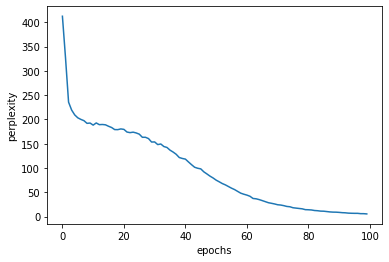

In [23]:
# coding: utf-8
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from ch05.simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


In [24]:
## 현재의 모델로는 큰 말뭉치에는 전혀 대응할 수 없다. 이런 문제는 다음 장에서 개선한다.

In [25]:
## 방금의 학습을 수행하는 RnnlmTrainer 클래스를 제공
## 이 클래스는 방금 수행한 RNNLM 학습을 클래스 안으로 숨겨준다.

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 417.93
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 353.88
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 248.56
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 217.86
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 209.83
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 208.10
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.56
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.17
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 195.02
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 190.87
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 193.52
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.48
| 에폭 13 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.86
| 에폭 14 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 187.29
| 에폭 15 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 186.96
| 에폭 16 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.19
| 에폭 17 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.34
| 에폭 18 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 184.66
| 에폭 19 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.16
| 에폭 20 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.58
| 에폭 21 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 178.03
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 178.

C:\Users\LoteeYoon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LoteeYoon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LoteeYoon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LoteeYoon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LoteeYoon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LoteeYoon\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 

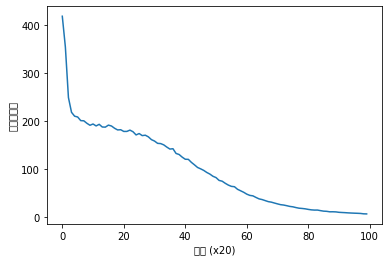

In [27]:
# coding: utf-8
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb
from ch05.simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()
